# EDA

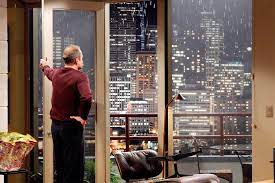

### Tasks
- Present at least 3 insights into the overall data
- Come up with at least 3 recommendations for the stakeholder

Therefore needed:
- well documented Jupyter Notebook
- updated README.md
- 10 min Google slides presentation

### Import all needed python modules
- Pandas for convenient dataframes.
- numpy get access to all the functions (like aggregate functions) for the dataframes and arrays
- matplotlib, seaborn, plotly for the plotting the data

In [2]:
# Import all needed modules.
import warnings

warnings.filterwarnings("ignore")

from datetime import datetime, date, time, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



### Understanding the data
- load the data
- get a feeling for the data 

In [3]:
# Load the data in a pandas dataframe.
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [4]:
# Explore the general structure of the data.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [5]:
# Show number of rows and columns.
print(f'The data set consists of {df.shape[0]} rows and {df.shape[1]} columns.')

The data set consists of 21597 rows and 21 columns.


In [6]:
# Get more info on the data types in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are values missing in:
- `yr_renovated`, a lot of missing values  -> these houses were never renovated?
- `waterfront`, a lot of missing values -> data is divided in 0, NaN and 1. 1 means view to a waterfront from the house and 0 and NaN no view?
- `view`, a few missing values -> these houses have not had any viewings yet. 

There are some columns with data types that have to be changed:
- `yr_renovated` to an integer
- `date` to a date 
- `sqft_basement` to an integer
- `price` to an integer



### First cleaning of the data
- get rid of NaNs 
- change the data type of some columns
- rename some columns

In [7]:
# Change all NaNs to 0 and convert the column to integers.
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype('int64')

df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype('int64')

df['view'] = df['view'].fillna(0)
df['view'] = df['view'].astype('int64')

In [8]:
# Convert date to datetime format.
df['date'] = pd.to_datetime(df['date'])
# Convert the columns to integer.
df['price'] = df['price'].astype('int64')

In [9]:
# The square footage of the basement is in strings due to a ? in the column.
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')
# The string was replaced by a 0 and is now converted to float.
df['sqft_basement'] = df['sqft_basement'].astype('float64')
# Finally the float is converted to integer.
df['sqft_basement'] = df['sqft_basement'].astype('int64')

In [10]:
# Rename some columns for better understanding of the data.
df.rename(columns={'view':'viewings'}, inplace=True)
df.rename(columns={'date':'sales_date'}, inplace=True)

In [11]:
# Call the current state of the data set.
df.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### First descriptive statistics of the data

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,1788.597,285.717,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,827.760,439.820,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Stakeholder infos
| Name                | Stakeholder | Characteristics |
| ------------------- | ----------- | ----------------|
| Amy Williams | Seller | Italian mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI |

#### Questions that arise
- What is a central, what an outskirt house?
- What makes an average outskirt house? 
- What is the upper 10 price margin for central houses?

#### Questions to answer
 | Question | Hypotheses | Indicators|
 | -------- | ---------- | --------- |
 | Does the condition impact the price of a house? | houses in better condition are pricier| compare condition and price |
 | Does a renovation impact the price of a house | renovated houses are pricier | renovation in the last years five years and price |
 | Does the King County grading system affect the prices of a house? | higher grades mean pricer house | grade and price |
 | Does the average prices differ between central and outskirt houses? | houses closer to city centers are pricier  | geolocation, ZIP code |
 | Does the interior living space differ between outskirt and city? | houses in the outskirts have more space | sqft_livingsquare|
 | Do outskirt houses have larger lot than city houses? | houses in the outskirts have more lot | sqft_lotsquare |
 | Does the square footage of the land lots of the nearest 15 neighbors increase in the outskirts? | the sqft lot increase in non central areas | sqft_lot15 |
 | Is the average condition and grade lower in the outskirts? | Both are lower in the outskirts | condition and grade |
 | Are houses in the outskirts younger? | houses in the outskirts are younger | yr_build |

### Exploring the data
- first of all, some general exploration (histograms and correlations of all data)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'sales_date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'viewings'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'cen

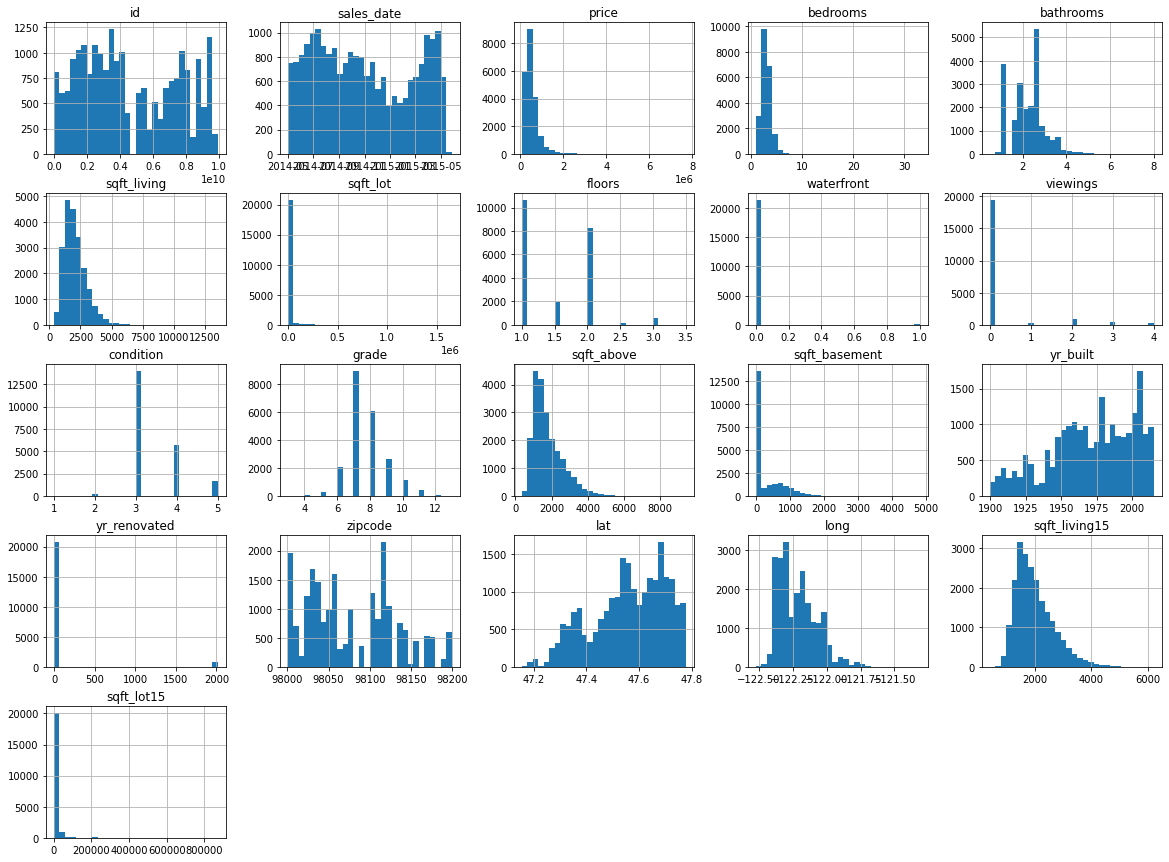

In [13]:
# Plot histograms for all columns to see the distributions.
df.hist(bins=30, figsize=(20,15))

<AxesSubplot:>

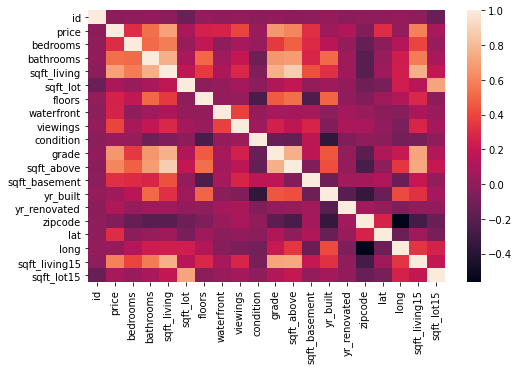

In [14]:
# Plot a correlation heatmap to see the which values correlate with each other.
sns.heatmap(df.corr())

### Geo mapping
The mapping is done via plotly. We need to define the outskirt, therefore we look at where the different zipcodes are located.

In [15]:
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(df,
                        lat="lat", lon="long",
                        color=df["zipcode"].astype(str),
                        hover_name="zipcode", 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map colored in the zipcodes')
# Get the Open Street Map Background
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

#### Defining the outskirt
From the map above we can conclude which areas are outskirt areas by their zipcode.

We defined that the zipcodes of the outskirt regions are:
98010, 98014, 98019, 98022, 98024, 98027, 98029, 98032, 98038, 98042, 98045, 98053, 98065, 98070, 98077, 98092

In [44]:
# Create a new column to which shows if the house has a central location or not.
df.eval('central_location = (zipcode != [98010, 98014, 98019, 98022, 98024, 98027, 98029, 98038, 98042, 98045, 98053, 98065, 98070, 98074, 98075, 98077, 98092])', inplace=True)
# Convert this new column in 
df['location'] = np.where(df['central_location'] == True, 'central', 'outskirt')
df.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,central_location,location
0,7129300520,2014-10-13,221900,3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,True,central
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,True,central
2,5631500400,2015-02-25,180000,2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,True,central
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,True,central
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,False,outskirt


In [45]:
df_outskirt = df.query('central_location == False')
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(df,
                        lat='lat', lon='long',
                        color='location',
                        hover_name='location',
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map where central and outskirt areas are shown')
                        
# Get the Open Street Map Background
fig.update_layout(mapbox_style="open-street-map", legend_title_text='Location')
fig.show(config={'scrollZoom': False})